# Homework 2

## Louie Wang

## Practicing using numpy to do math, and more visualizations


In [1]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

## Create a vector of 1000 random numbers from a Normal distribution with mean 5 and standard deviation 10 and plot the discrete probability density function using a histogram

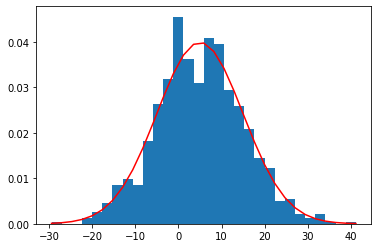

In [3]:
vec = np.random.default_rng().normal(5,10,1000)
count,bins,ignored = plt.hist(vec, 30, density = True)
plt.plot(bins, 1/(10*np.sqrt(2*np.pi))*np.exp(-(bins-5)**2/200),color = 'r')
plt.show()

'''
x = np.random.normal(loc=5,scale=10,size=1000)
plt.hist(x,bins='sturges')
plt.xlabel('random values')
plt.ylabel('pdf')
plt.yticks([50,100,150,200,250],['0.05','0.1','0.15','0.2','0.25'])
plt.show()
'''

## Create a discrete cummulative density function plot using the same vector as the last question using a line graph
Annotate the point, $x$, where 80% of the data < $x$ and 20% of the data is greater than $x$

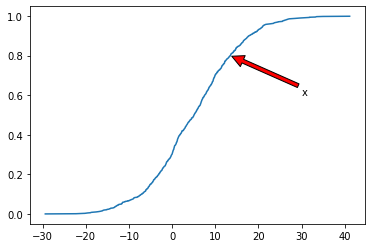

In [4]:
value = np.sort(vec)
plt.plot(value, np.array(range(1000))/float(1000))
x_val = np.quantile(value, 0.8)
plt.annotate('x',(x_val,0.8),xytext=(30,0.6),arrowprops=(dict(facecolor='red',shrink=0.02)))
plt.show()

'''
x_sorted = np.sort(x)
x_sorted.shape
cdf = np.linespace(0,1,num=x_sorted.shape[0]+1)
plt.plot(np.insert(arr=x_sorted,obj=0,values=np.nan),cdf,'g-')
plt.legend(['cdf','80% pt at {:.2f}'.format(x_sorted[np.argmin(np.abs(cdf-0.8))-2])])
plt.xlabel('random values')
plt.ylabel('cdf')
plt.show()
'''

## Load in the data from melb_data.csv into a pandas dataframe.  Create a box and whisker graph comparing the prices in the suburbs:
  - Reservoir         
  - Richmond          
  - Bentleigh East

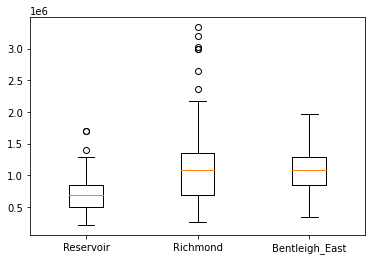

In [5]:
df = pd.read_csv('melb_data.csv')
df_re = df[df['Suburb']=='Reservoir']['Price'].tolist()
df_ri = df[df['Suburb']=='Richmond']['Price'].tolist()
df_b = df[df['Suburb']=='Bentleigh East']['Price'].tolist()
price = [df_re, df_ri, df_b]
plt.boxplot(price,labels=['Reservoir','Richmond','Bentleigh_East'])
plt.show()

'''
df_sub = df[(df['Suburb'] == 'Reservoir') | (df['Suburb'] == 'Richmond') | (df['Suburb'] == 'Bentleigh East')]
df_sub.boxplot(columns='Price', by='Suburb')
plt.ylabel('price')
'''

## Consider the vectors:
  - $\alpha$ which begins at (0,0) and ends at (1,1)
  - $\beta$ which begins at (1,1) and ends at (0,1)
  
Draw $\alpha$ and $\beta$ using a line graph using a different color for each vector.

Now, using matrix multiplication rotate the vectors 45degress and draw the result

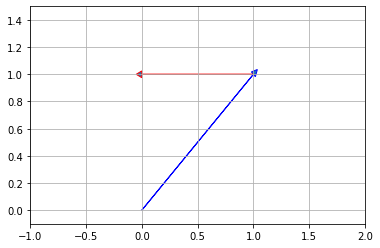

In [6]:
alpha = np.array([[1],[1]])
beta = np.array([[-1],[0]])
ax = plt.axes()
a_alpha = ax.arrow(0,0,1,1, ec='blue',head_width=0.05,head_length=0.05)
a_beta = ax.arrow(1,1,-1,0,ec='red',head_width=0.05,head_length=0.05)
plt.xlim(-1,2)
plt.ylim(-0.1,1.5)
plt.grid()
plt.show()

'''
alpha = np.array([[0,0],[1,1]])
beta = np.array([[1,1],[0,1]])
plt.plot(alpha[:,0], alpha[:,1],'g-')
plt.plot(beta[:,0],beta[:,1],'k-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
'''

alpha: (1,1)  
beta: (-1,0)

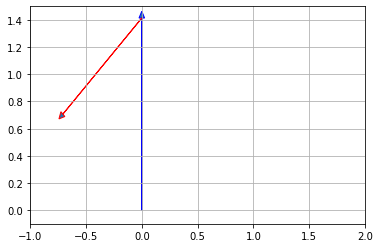

In [8]:
theta = np.pi/4
rot_mat = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
new_alpha = np.matmul(rot_mat, alpha)
new_beta = np.matmul(rot_mat, beta)

i1, j1 = float(new_alpha[0]), float(new_alpha[1])
i2, j2 = float(new_beta[0]), float(new_beta[1])
ax = plt.axes()
n_alpha = ax.arrow(0,0,i1,j1,ec='blue',head_width=0.05,head_length=0.05)
n_beta = ax.arrow(i1,j1,i2,j2,ec='red',head_width=0.05,head_length=0.05)
plt.xlim(-1,2)
plt.ylim(-0.1,1.5)
plt.grid()
plt.show()

'''
theta = np.pi/4
rot_mat = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
alpha_rot = np.matmul(rot_mat, alpha)
beta_rot = np.matmul(rot_mat, beta)
plt.plot(alpha_rot[:,0],alpha_rot[:,1],'g-')
plt.plot(beta_rot[:,0],beta_rot[:,1],'k-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
'''

new alpha: (0, sqrt(2))    
new beta: (-sqrt(2)/2, sqrt(2)/2)

## Consider the following system of equations:
  - $2x +  y + z = 5$
  - $4x - 6y     = -2$
  - $-2x + 7y + 2z = 9$
  
Convert the coefficents of the system of equations to a matrix, $A$, where the first column contains the $x$ coefficents, the second column contains the $y$ coefficents, and the third column contains the $z$ coefficents. 
Covert the values on the right hand side to a (3,1) vector, $b$, (make sure you keep all the numbers in order.  Now, solve for $(x,y,z)$ by inverting $A$ and multiplying by $b$, eg, $A^{-1} * b$. 

In [9]:
A = np.array([[2,1,1],[4,-6,0],[-2,7,2]])
b = np.array([[5],[-2],[9]])
print(np.matmul(np.linalg.inv(A),b))

[[1.]
 [1.]
 [2.]]


Output: x=1, y=1, z=2